# Loan Approval Prediction

In [185]:
import pandas as pd
import numpy as np
from pathlib import Path

In [186]:
data_path =  Path("./data")

In [187]:
data = pd.read_csv(data_path / "train.csv")

## EDA

In [188]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [189]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [191]:
data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

## Visualizations

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

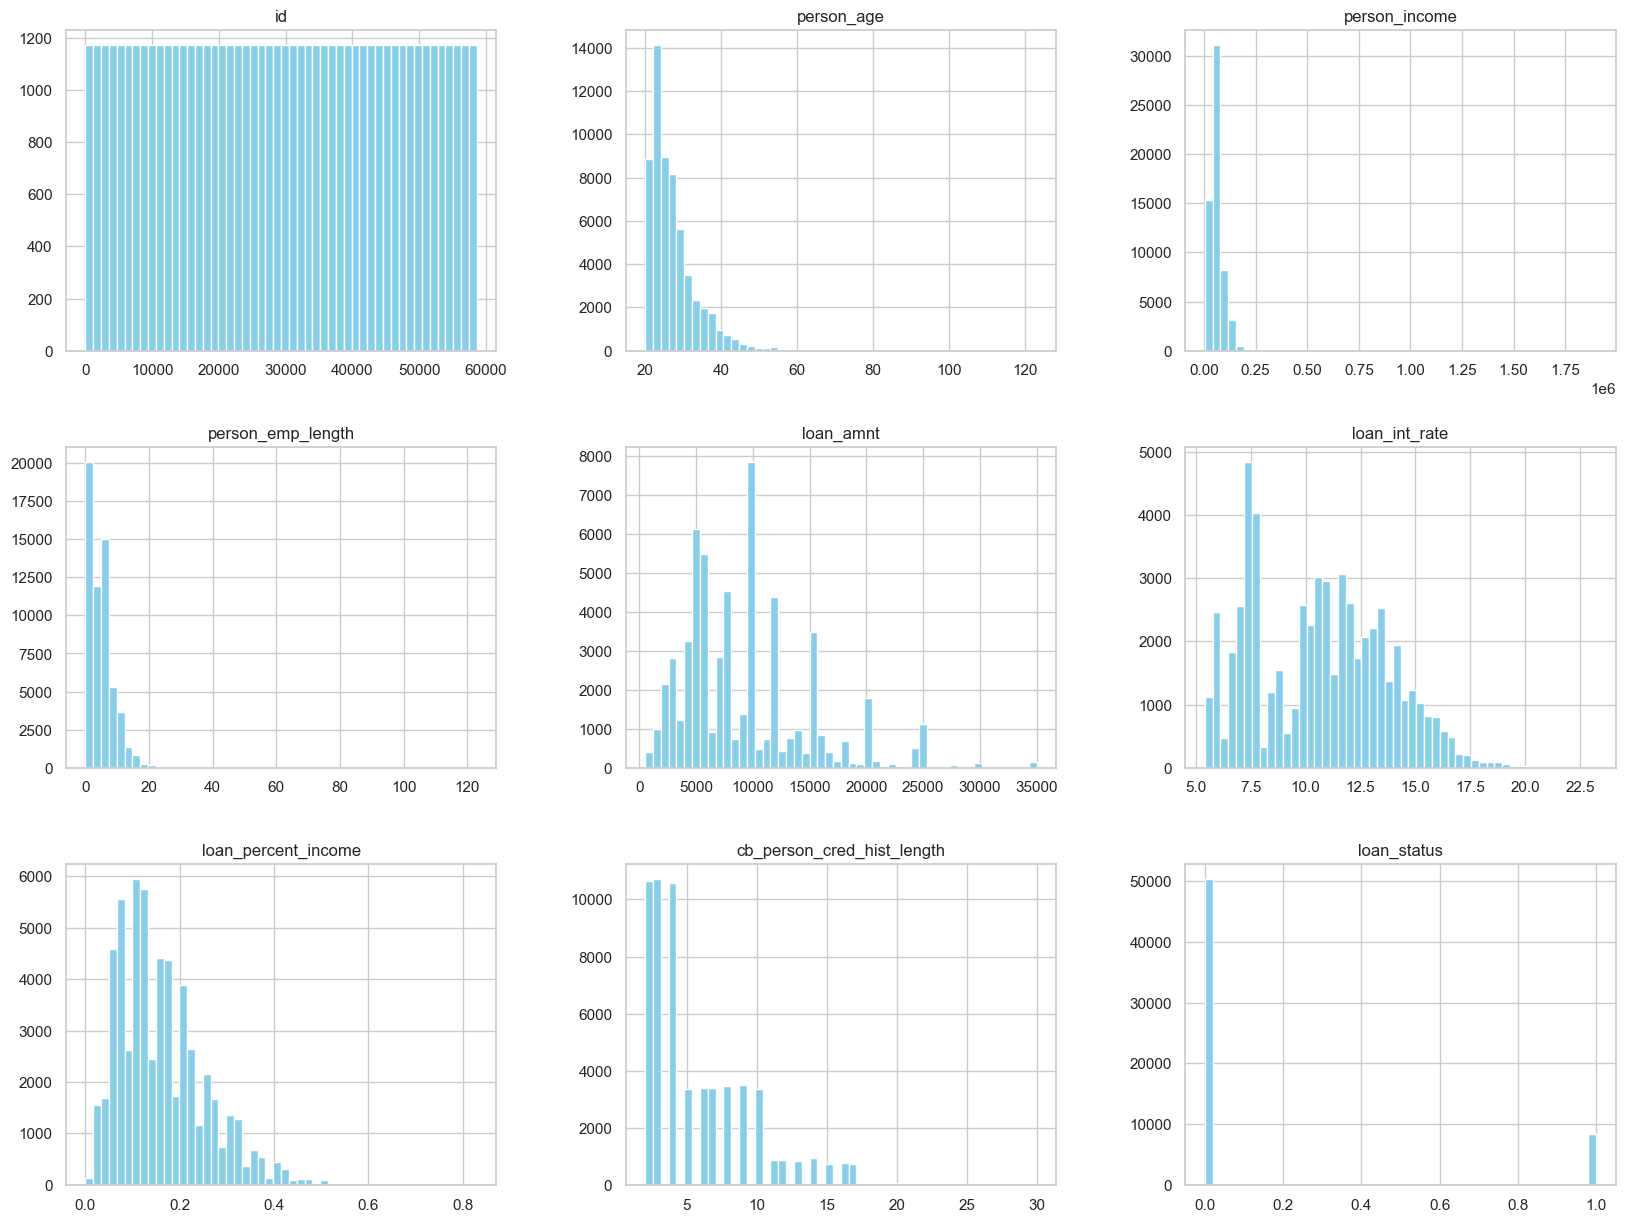

In [193]:
data.hist(bins=50, figsize=(20,15), color='skyblue')

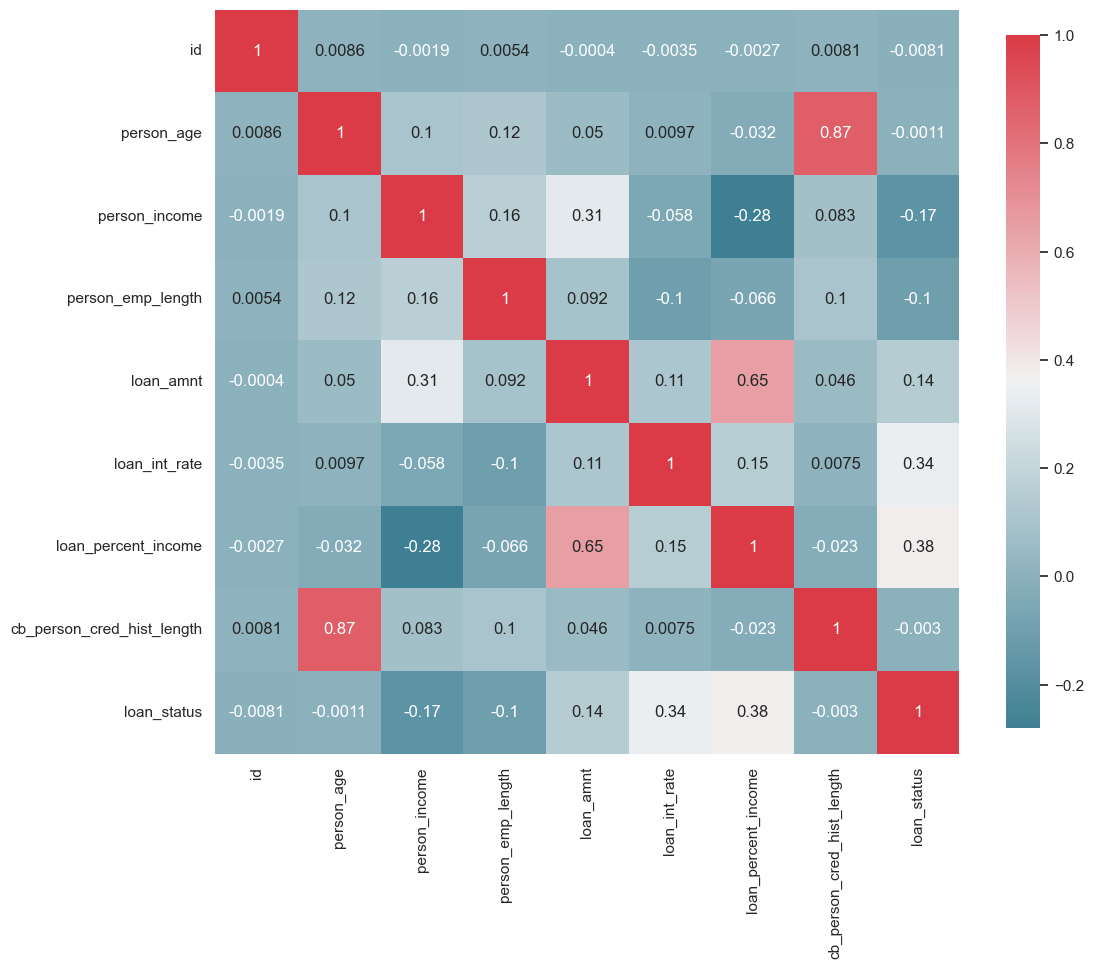

In [194]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
def plot_correlation_map( df ):
	corr = df.corr()
	_ , ax = plt.subplots( figsize =( 12 , 10 ) )
	cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
	_ = sns.heatmap(
		corr, 
		cmap = cmap,
		square=True, 
		cbar_kws={ 'shrink' : .9 }, 
		ax=ax, 
		annot = True, 
		annot_kws = { 'fontsize' : 12 }
	)

plot_correlation_map(data[numerical_cols])

In [195]:
# Squaring the numerical columns
squared_numerical_cols = data[numerical_cols].apply(lambda x: x**2)
root_numerical_cols = data[numerical_cols].apply(lambda x: np.sqrt(x))
square_cols_names = [f"{col}_squared" for col in numerical_cols]
root_cols_names = [f"{col}_root" for col in numerical_cols]

In [196]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix_squared = squared_numerical_cols.corr(numeric_only=True)
corr_matrix_root = root_numerical_cols.corr(numeric_only=True)

In [197]:
# Append the 3 correlation matrices
appended_corr_matrices = pd.concat([corr_matrix, corr_matrix_squared, corr_matrix_root], axis=1, keys=['Original', 'Squared', 'Root'])
appended_corr_matrices

Original                           \
                                  id person_age person_income   
id                          1.000000   0.008608     -0.001896   
person_age                  0.008608   1.000000      0.102176   
person_income              -0.001896   0.102176      1.000000   
person_emp_length           0.005376   0.121276      0.164042   
loan_amnt                  -0.000403   0.050378      0.310942   
loan_int_rate              -0.003454   0.009653     -0.057611   
loan_percent_income        -0.002677  -0.031975     -0.280314   
cb_person_cred_hist_length  0.008139   0.874260      0.082727   
loan_status                -0.008138  -0.001130     -0.169956   

                                                                      \
                           person_emp_length loan_amnt loan_int_rate   
id                                  0.005376 -0.000403     -0.003454   
person_age                          0.121276  0.050378      0.009653   
person_income                       0.164042  0.310942     -0.057611   
person_emp_length                   1.000000  0.092046     -0.101910   
loan_amnt                           0.092046  1.000000      0.113582   
loan_int_rate                      -0.101910  0.113582      1.000000   
loan_percent_income                -0.065824  0.647266      0.152201   
cb_person_cred_hist_length          0.102842  0.045720      0.007535   
loan_status                        -0.100428  0.144982      0.338948   

                                                                           \
                           loan_percent_income cb_person_cred_hist_length   
id                                   -0.002677                   0.008139   
person_age                           -0.031975                   0.874260   
person_income                        -0.280314                   0.082727   
person_emp_length                    -0.065824                   0.102842   
loan_amnt                             0.647266                   0.045720   
loan_int_rate                         0.152201                   0.007535   
loan_percent_income                   1.000000                  -0.023202   
cb_person_cred_hist_length           -0.023202                   1.000000   
loan_status                           0.378280                  -0.003030   

                                         Squared  ...                  Root  \
                           loan_status        id  ... loan_status        id   
id                           -0.008138  1.000000  ...   -0.007984  1.000000   
person_age                   -0.001130  0.008151  ...    0.002900  0.008370   
person_income                -0.169956 -0.003907  ...   -0.037181 -0.001863   
person_emp_length            -0.100428  0.007305  ...   -0.033491  0.004003   
loan_amnt                     0.144982  0.003543  ...    0.142181 -0.002290   
loan_int_rate                 0.338948 -0.002925  ...    0.363647 -0.003499   
loan_percent_income           0.378280 -0.001821  ...    0.422627 -0.002197   
cb_person_cred_hist_length   -0.003030  0.005916  ...    0.005059  0.008366   
loan_status                   1.000000 -0.007984  ...    1.000000 -0.007870   

                                                                       \
                           person_age person_income person_emp_length   
id                           0.008370     -0.001863          0.004003   
person_age                   1.000000      0.120930          0.070035   
person_income                0.120930      1.000000          0.194833   
person_emp_length            0.070035      0.194833          1.000000   
loan_amnt                    0.049640      0.366304          0.093878   
loan_int_rate                0.007555     -0.075510         -0.103143   
loan_percent_income         -0.037753     -0.337288         -0.062158   
cb_person_cred_hist_length   0.859743      0.101907          0.061727   
loan_status                 -0.003137     -0.214647         -0.111412  

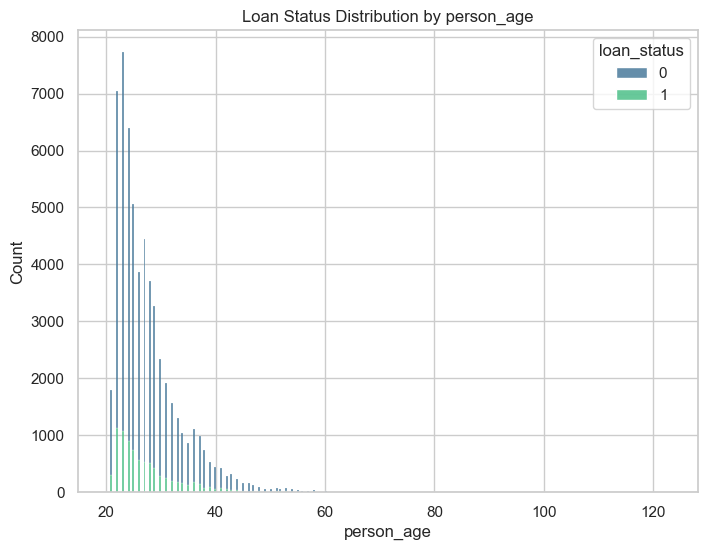

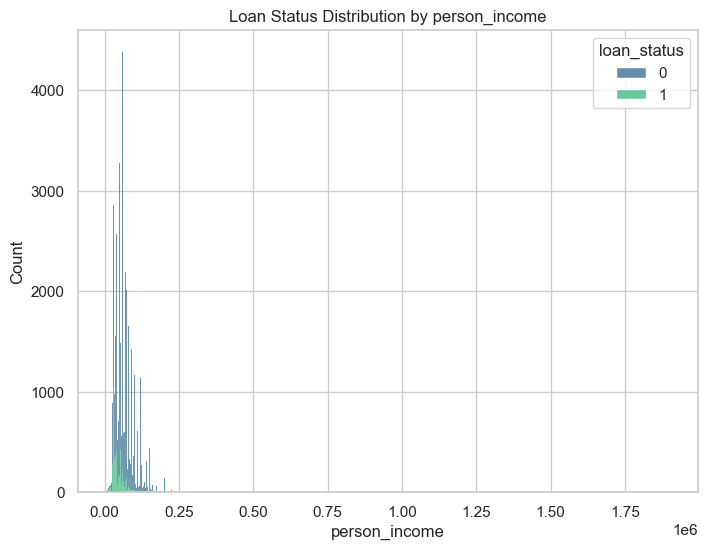

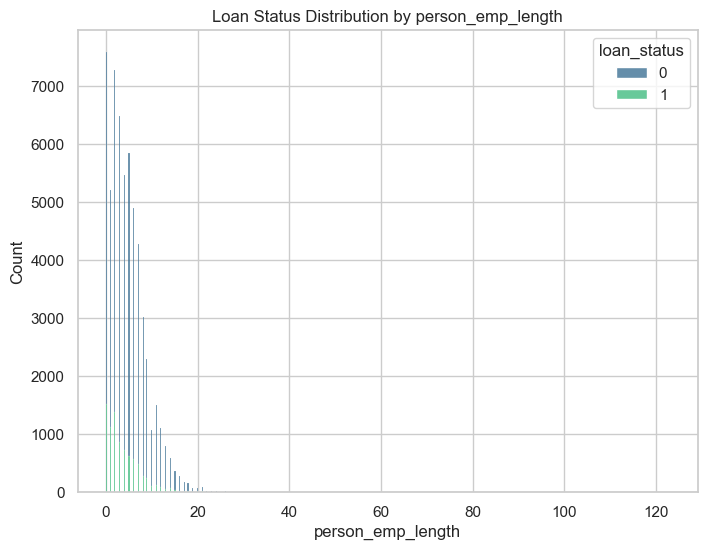

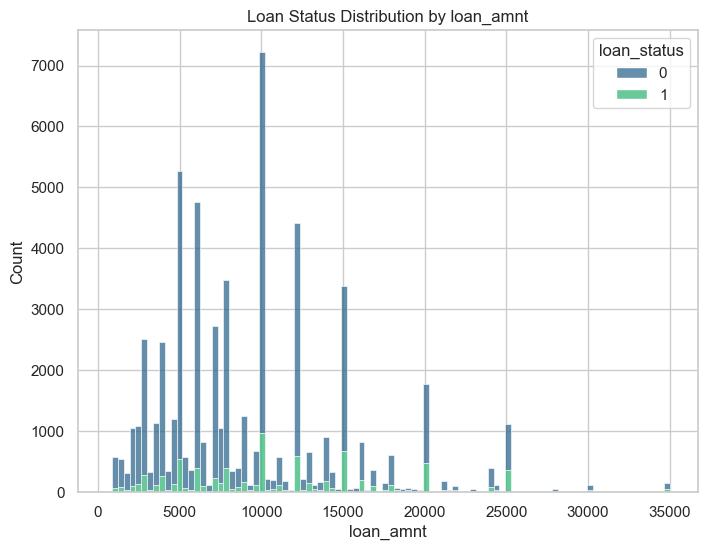

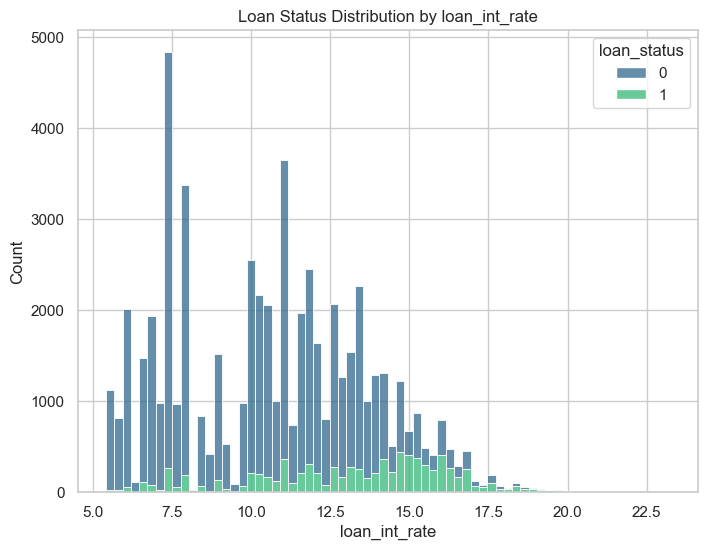

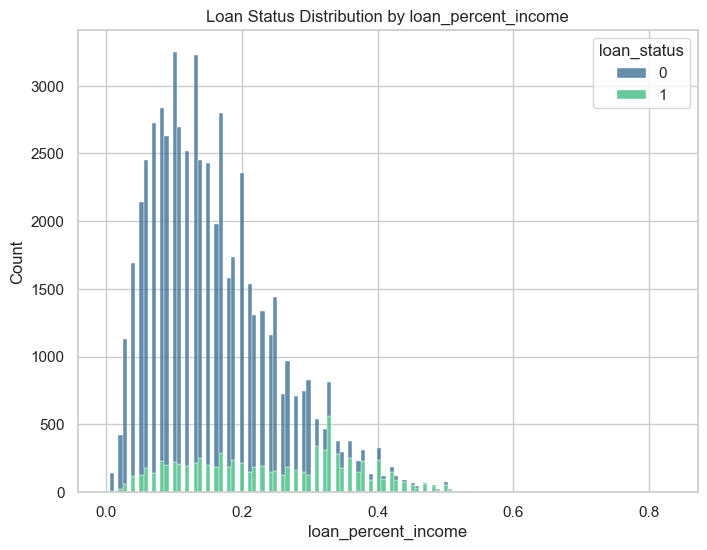

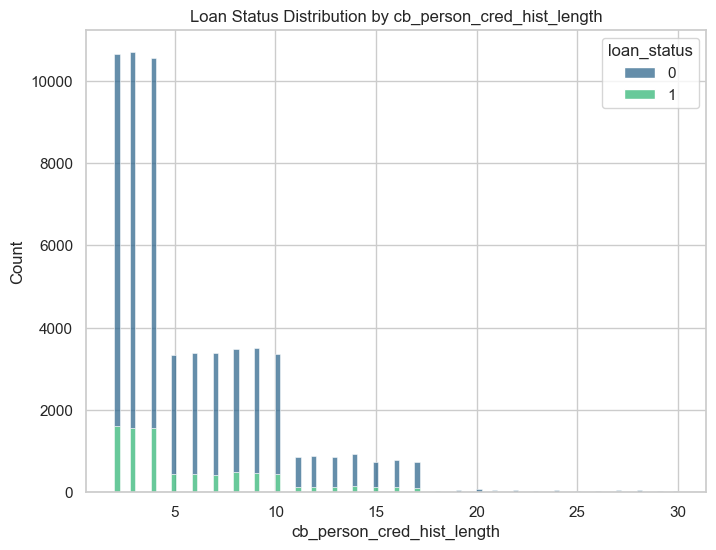

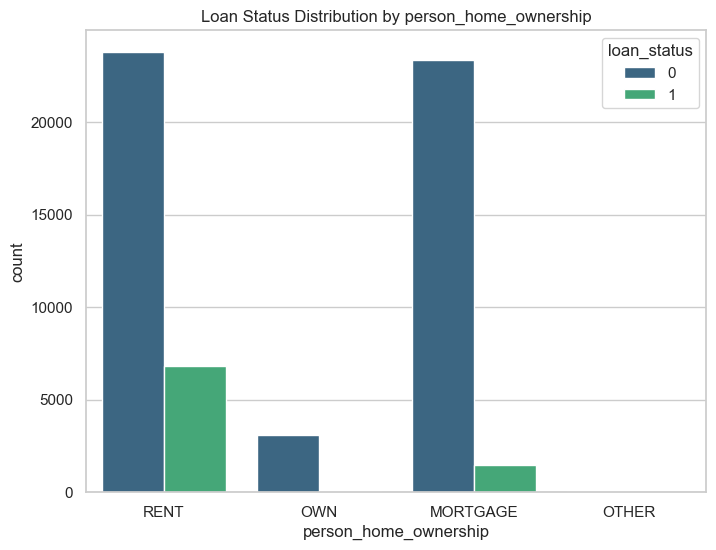

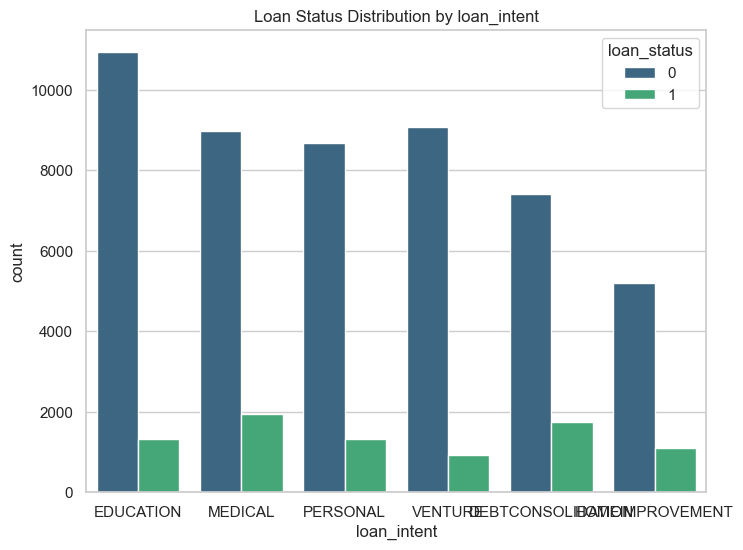

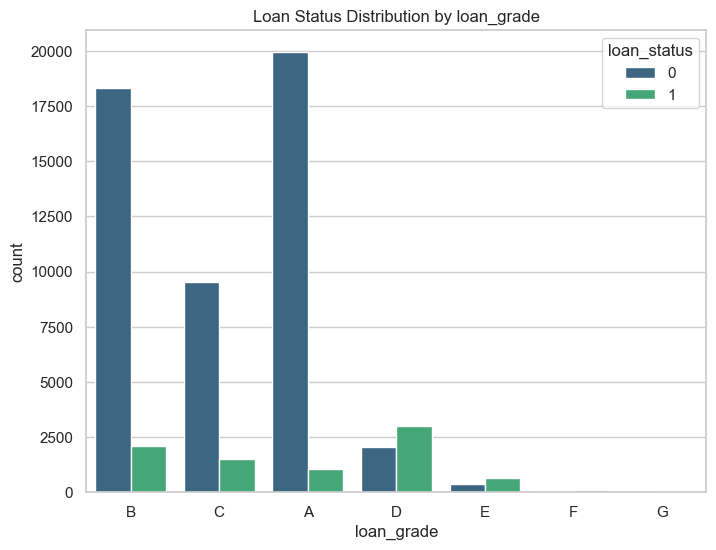

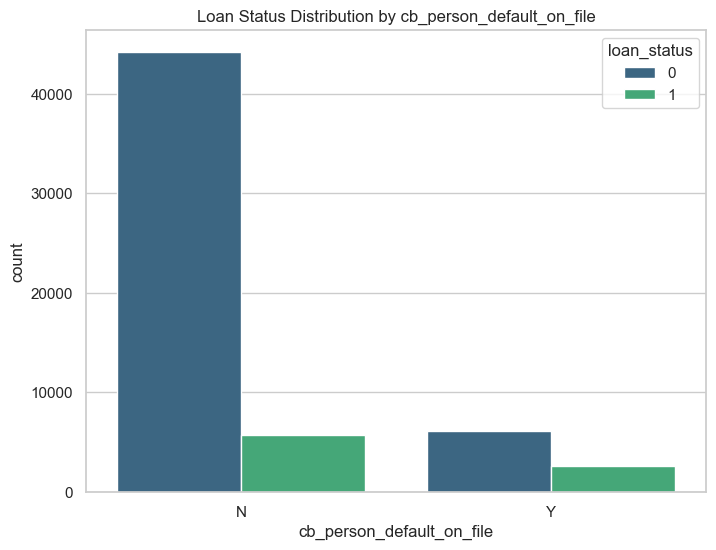

In [198]:
# Define which columns are numerical and which are categorical
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                     'cb_person_cred_hist_length']
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                       'cb_person_default_on_file']

# Set up a seaborn style
sns.set(style="whitegrid")

# Plot numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, hue='loan_status', multiple='stack', kde=False, palette='viridis')
    plt.title(f'Loan Status Distribution by {col}')
    plt.show()

# Plot categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue='loan_status', palette='viridis')
    plt.title(f'Loan Status Distribution by {col}')
    plt.show()

## Model Building

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [207]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [208]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

In [209]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X.select_dtypes(include=[np.number]).columns
numerical_cols = numerical_cols.drop('id')

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [210]:
X.drop(categorical_columns, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

In [211]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
												  test_size=0.2, 
												  random_state=42,
												  stratify=y)

In [212]:
rnd_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-2)

In [214]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-2, random_state=42)

In [215]:
y_pred_val = rnd_forest.predict(X_val)

In [216]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Accuracy: 0.9507204365248529
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729

[[9969   90]
 [ 488 1182]]


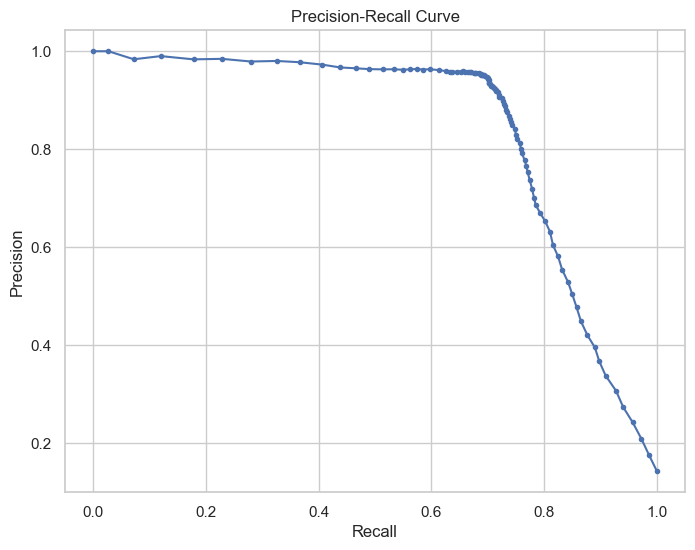

In [218]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities
y_scores = rnd_forest.predict_proba(X_val)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [220]:
from sklearn.model_selection import GridSearchCV
# Parameter grid
param_grid = {
	'n_estimators': [50, 100, 200],
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=2, n_jobs=-2, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [221]:
best_estimator.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [222]:
y_pred_val = best_estimator.predict(X_val)

In [223]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(classification_report(y_val, y_pred_val))

Accuracy: 0.9509762128058658
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



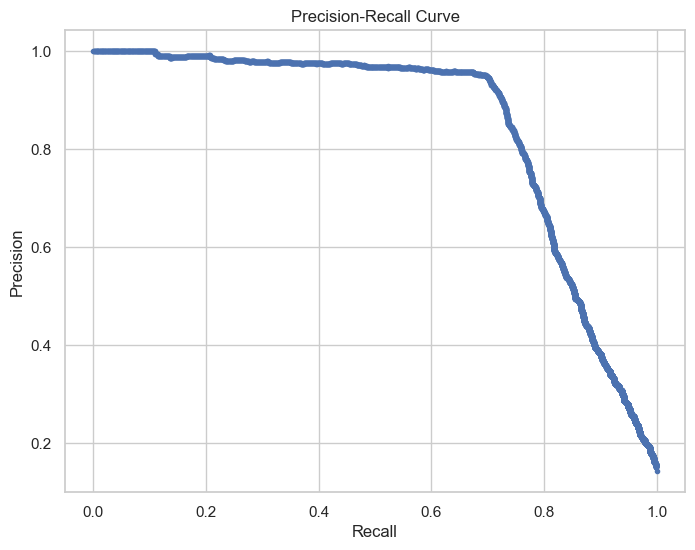

In [224]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities
y_scores = best_estimator.predict_proba(X_val)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

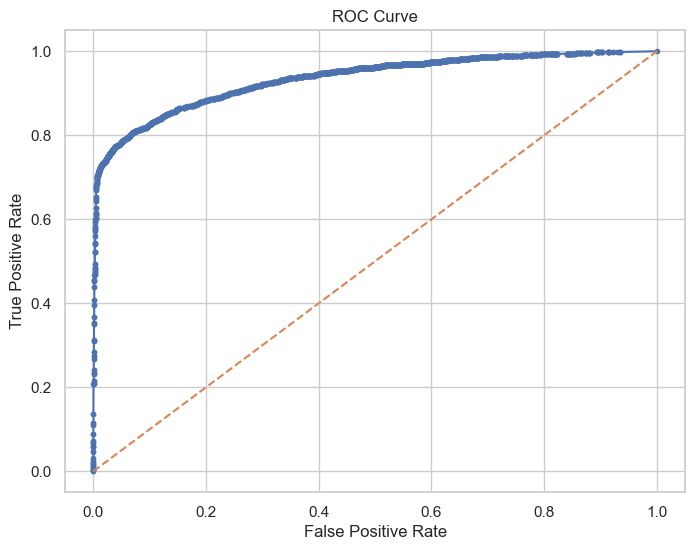

0.9342370433603417

In [225]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

# Calculate the ROC AUC
roc_auc_score(y_val, y_scores)